### Add scripts to the notebooks path

In [1]:
import os, sys

current_dir = os.getcwd()
print(current_dir)

# Get the parent directory
parent_dir = os.path.dirname(current_dir)

scripts_path = os.path.join(parent_dir, 'scripts')

# Insert the path to the parent directory
sys.path.insert(0, parent_dir)

# Insert the path to the Scripts directory
sys.path.insert(0, scripts_path)

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..')))

d:\KifiyaAIM-Course\Week - 10\Brent-Oil-Market-Dynamics\notebooks


### Import Statements

In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set_theme()

### Load Data

In [4]:
DATA_PATH = "../data/Brent_Oil_Prices.csv"
data = pd.read_csv(DATA_PATH)

### Economic Indicators Analysis

In [5]:
from scripts.enconomic_indicator_analyzer import Analyzer

analyzer = Analyzer()

1) Download indicators form world bank's api

In [6]:
# first define the date range, which is the start and end date of the data presented
start_date = '1987-05-20'
end_date = '2022-11-14'

# define the economic indicators
unemployment_indicator = 'SL.UEM.TOTL.ZS'       # Unemployment rate
gdp_indicator = 'NY.GDP.MKTP.CD'                # GDP in US$
exchange_rate_indicator = 'PA.NUS.FCRF'         # Exchange rate in relation to USD
cpi_indicator = 'FP.CPI.TOTL.ZG'                # Inflation 

# now fetch the data
gdp_data = analyzer.fetch_data(gdp_indicator, 'GDP', country='WLD', start_date=start_date, end_date=end_date)
cpi_data = analyzer.fetch_data(cpi_indicator, 'CPI', country='WLD', start_date=start_date, end_date=end_date)
unemployment_data = analyzer.fetch_data(unemployment_indicator, 'Unemployment Rate', country='WLD', start_date=start_date, end_date=end_date)
exchange_rate_data = analyzer.fetch_data(exchange_rate_indicator, 'Exchange Rate', country='EMU', start_date=start_date, end_date=end_date)

2) Clean the fetched data

In [7]:
gdp_data = analyzer.clean_data(gdp_data)
cpi_data = analyzer.clean_data(cpi_data)
unemployment_data = analyzer.clean_data(unemployment_data)
exchange_rate_data = analyzer.clean_data(exchange_rate_data)

In [8]:
exchange_rate_data.dtypes

date             datetime64[ns]
Exchange Rate           float64
dtype: object

3. Convert the fetched data to daily frequency, since the indicators are collected with a delay of 1 month this step basically interpolates the data to each data of the respective data collection month.

In [9]:
gdp_data_daily = analyzer.convert_to_daily(data=gdp_data)
cpi_data_daily = analyzer.convert_to_daily(data=cpi_data)
unemployment_data_daily = analyzer.convert_to_daily(data=unemployment_data)
exchange_rate_data_daily = analyzer.convert_to_daily(data=exchange_rate_data)

4) Convert the date column in the price data to a date object

In [10]:
data['Date'] = pd.to_datetime(data['Date'])

C:\Users\VICTUS 16\AppData\Local\Temp\ipykernel_1648\1453708669.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


Now that the economic indicator data has been downloaded, cleaned and prepaired the analysis will begin

Correlation between GDP and oil prices: 0.7567554273993587


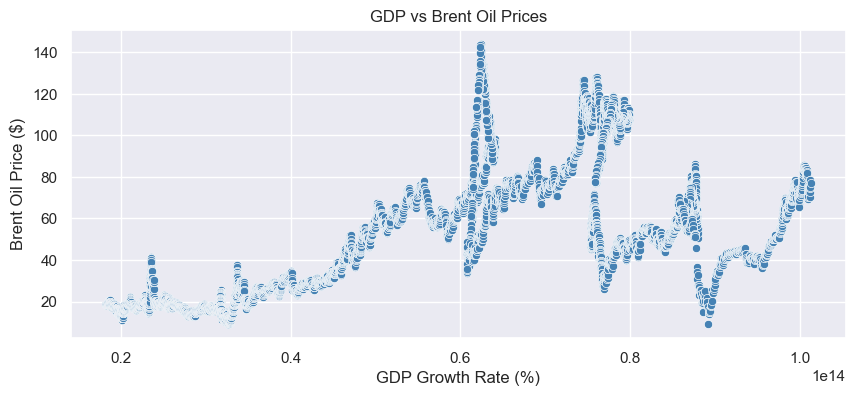

Correlation between CPI and oil prices: -0.40936074703516684


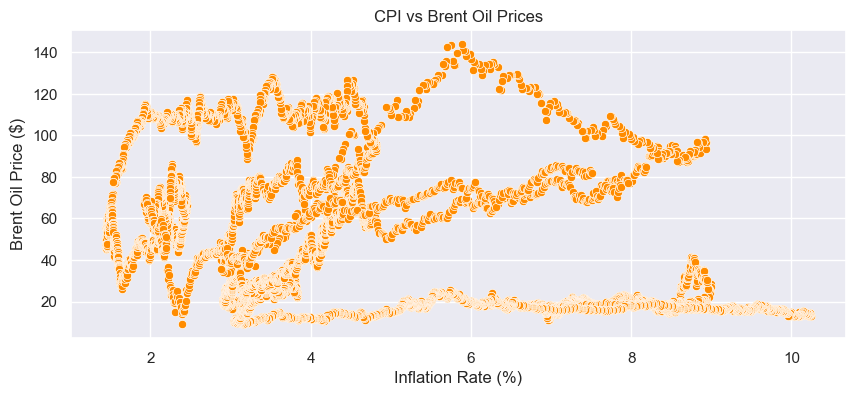

Correlation between Unemployment Rate and oil prices: 0.17293234258935572


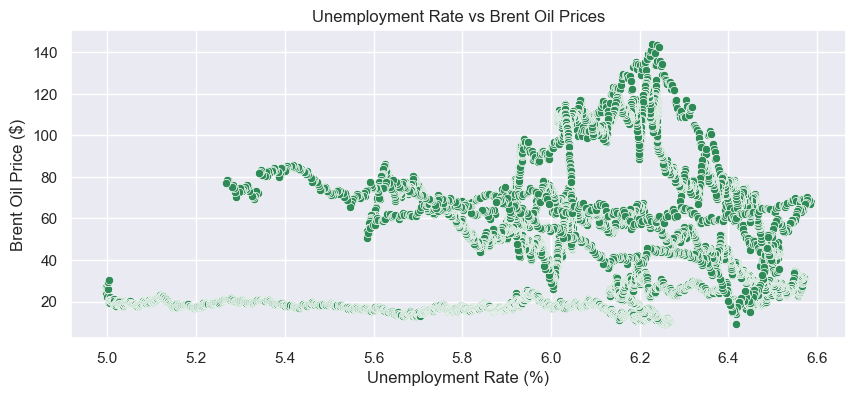

Correlation between Exchange Rate and oil prices: -0.6736337150209084


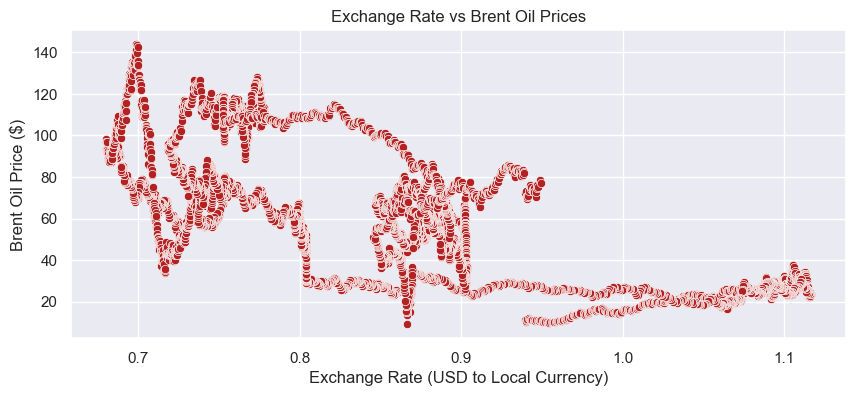

In [11]:
analyzer.analyz_indicators(gdp_data_daily, cpi_data_daily, unemployment_data_daily, exchange_rate_data_daily, data)

***Observations:***

- There is a positive correlation between the GDP growth rate and Brent oil prices, 0.7567554273993587 to be exact. As the GDP growth rate increases, the Brent oil prices tend to rise as well. This is visually evident from the denser and more varied data points appearing as the GDP growth rate increases. This pattern suggests that higher economic growth (GDP growth rate) is associated with higher oil prices. Such a relationship can be crucial for economic analysis and policy-making, indicating that as economies expand, the demand for oil—and consequently its price—tends to rise.

- Despite some scattering, there seems to be a negative correlation where higher inflation rates are associated with lower oil prices. This suggests that as inflation rises, Brent oil prices tend to increase as well. The correlation value is -0.40936074703516684.

- While some patterns may be observable, the scatter suggests that there is no strong, clear correlation between unemployment rates and oil prices. They have a 0.17293234258935572 correlation value. The variability means that changes in the unemployment rate do not consistently predict changes in Brent oil prices.

- There is noticeable clustering of data points around certain exchange rates and price levels, suggesting some level of correlation. For instance, as the exchange rate increases, there seems to be a general trend of lower Brent oil prices. The correlation value is -0.6736337150209084.